# Compress network

This notebook demonstrates how to use the model compression functionality
to simplify Boolean networks before optimization by:
1. Finding and removing non-observable and non-controllable nodes
2. Collapsing linear paths that don't provide additional information
3. Visualizing compression results

In [1]:
import sys
import os
import numpy as np
sys.path.append('./src')

from BNMPy import BMatrix, vis
from Optimizer.model_compressor import ModelCompressor, compress_model

In [2]:
network_string = """
Input1 = Input1
Input2 = Input2
A = Input1
B = A
C = B
D = C | Input2
E = D
Output1 = E
F = Input1 & Input2
G = F
Isolated = Isolated
H = G
Output2 = H
SelfLoop = SelfLoop & Input1
"""
measured_nodes = {'Output1', 'Output2'}
perturbed_nodes = {'Input1', 'Input2'}

network = BMatrix.load_network_from_string(network_string)

No initial state provided, using a random initial state
Network loaded successfully. There are 14 genes in the network.


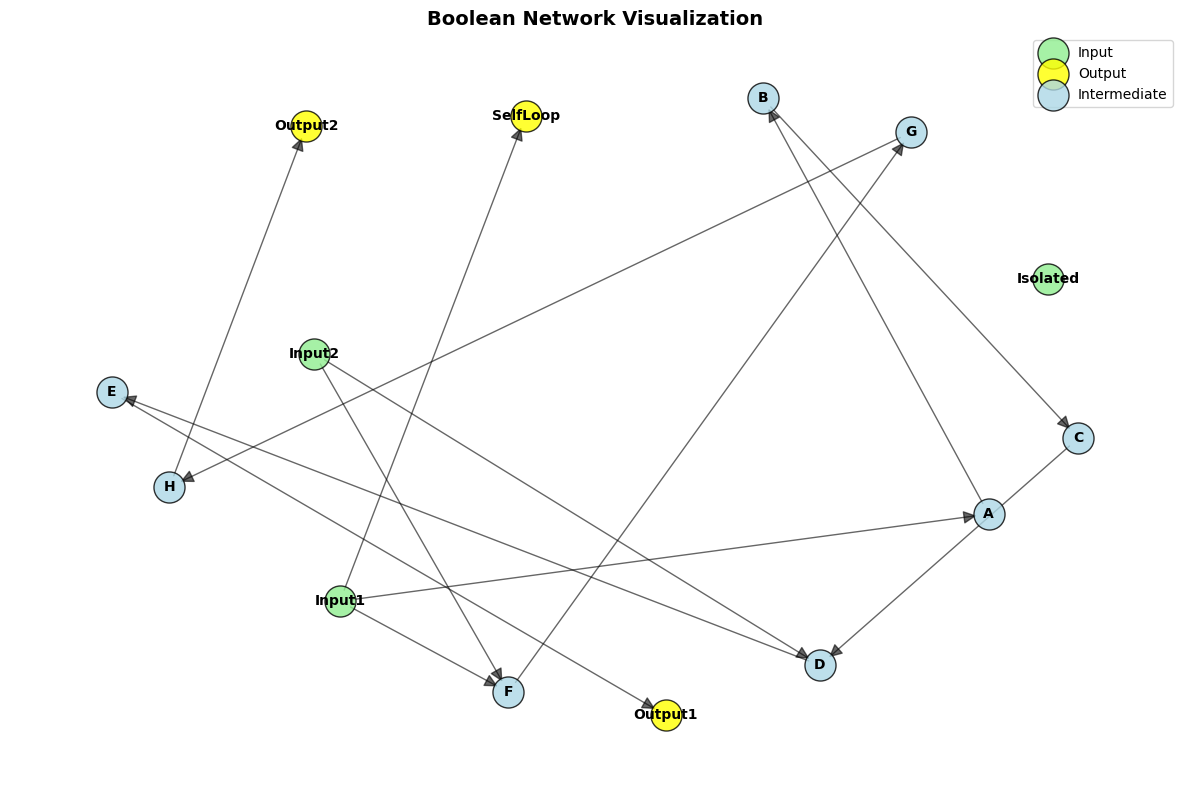

In [3]:
vis.vis_network(network)

In [4]:
vis.vis_network(network, output_html="files/original_network.html", interactive=True)

Network visualization saved to original_network.html


In [4]:
# Compress
compressed_network, compression_info = compress_model(
    network,
    measured_nodes=measured_nodes,
    perturbed_nodes=perturbed_nodes
)

Model Compression Summary:
  Measured nodes: Output1, Output2
  Perturbed nodes: Input1, Input2

Removed 2 non-observable nodes
  Non-observable: Isolated, SelfLoop
Removed 1 non-controllable nodes
  Non-controllable: Isolated
Collapsed 3 linear paths
  Path 1: A -> B -> C
  Path 2: E -> Output1
  Path 3: G -> H -> Output2

Total nodes removed/collapsed: 9
Final network size: 7 nodes


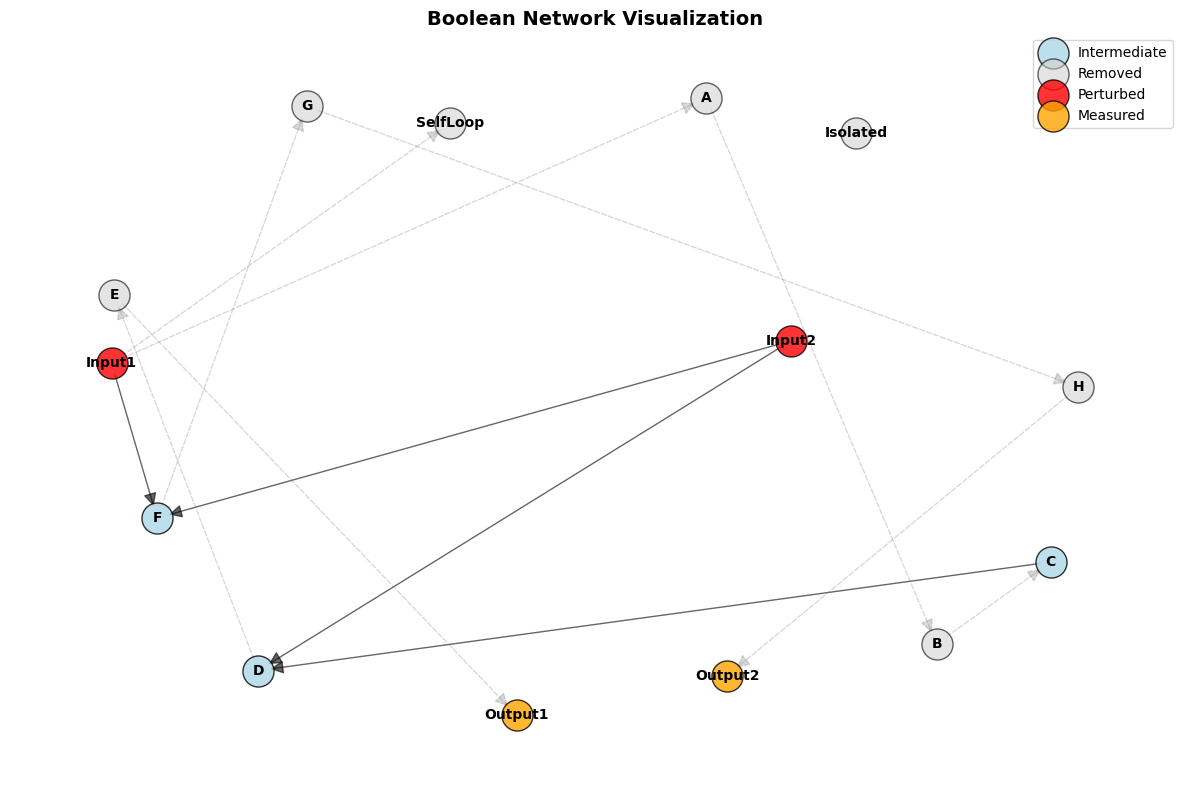

In [7]:
vis.vis_compression(
    network,
    compressed_network,
    compression_info
    )

In [8]:
vis.vis_compression(
    network,
    compressed_network,
    compression_info,
    "files/compression_comparison.html",
    interactive=True
)

Network visualization saved to files/compression_comparison.html


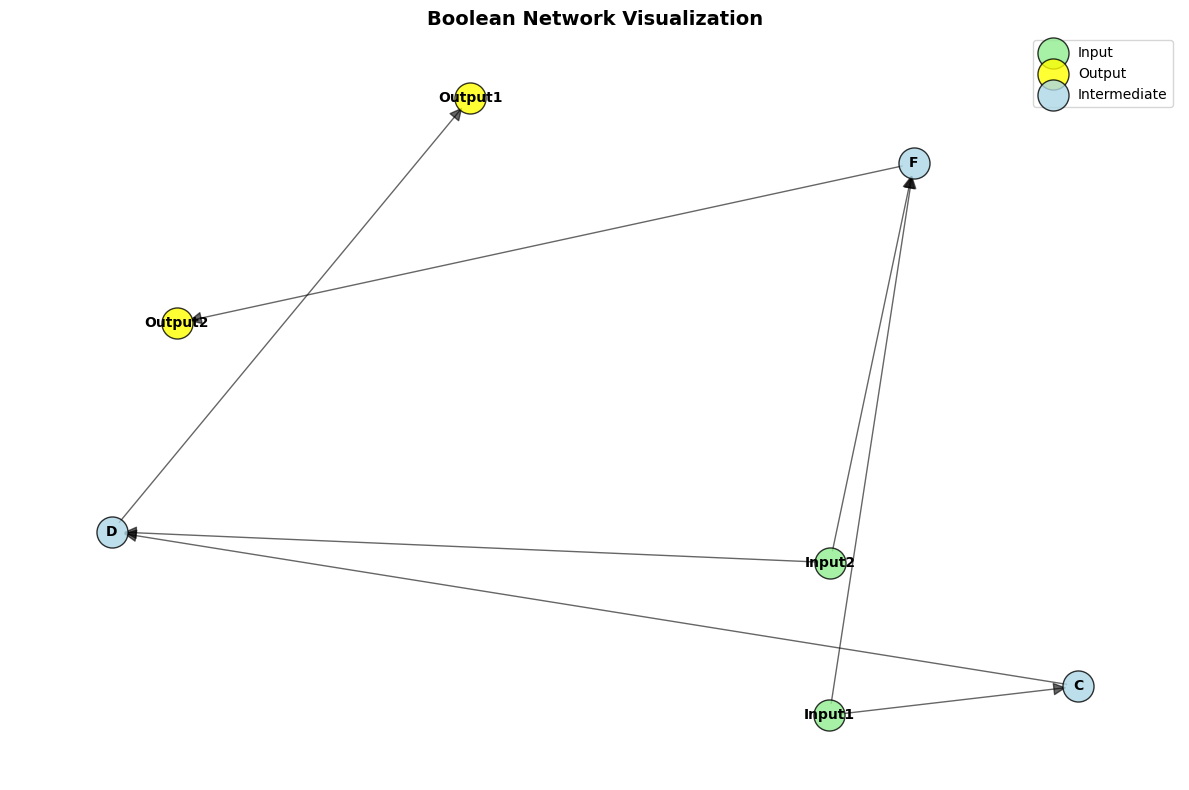

In [9]:
vis.vis_network(compressed_network)

In [11]:
print("Compressed network:")
print("\n".join(compressed_network.equations))

Compressed network:
Input1 = Input1
Input2 = Input2
C = Input1
D = C | Input2
Output1 = D
F = Input1 & Input2
Output2 = F
